## Problem Statement

According to the National Crime Records Bureau, nearly 24,012 people die each day due to a delay in getting medical assistance. Many accident victims wait for help at the site, and a delay costs them their lives. The reasons could range from ambulances stuck in traffic to the fire brigade not being able to reach the site on time due to traffic jams. 

The solution to the above problem is to create a system that automatically detects the emergency vehicle prior to reaching the traffic signals and change the traffic signals accordingly.

 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import Libraries

In [19]:
#1/5/22
# for audio pre-processing and analysis:
import librosa as lib

# for audio features creation
import scipy

# for array processing:
import numpy as np

# for visualizing the data
from matplotlib import pyplot as plt
%matplotlib inline 

# for playing audio
import IPython.display as ipd

# for splitting data into train-test:
from sklearn.model_selection import train_test_split

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import * 
from keras.utils import *


epochs_value=10 #Main game changer ,
sampling_rate=16000 
NOS=32000

# sampling_rate=10000 
# NOS=20000

# sampling_rate=40000 
# NOS=32000

import math

## 2. Load Audio Data

Using load function in librosa importing the audio files. The two audio clips contain multiple audio sounds recorded at different places.

In [20]:
# importing emergency file:
emergency, sample_rate = lib.load('/content/drive/MyDrive/MTECH/audio/emergency.wav', sr=sampling_rate)

# importing non-emergency file:
non_emergency, sample_rate = lib.load('/content/drive/MyDrive/MTECH/audio/non emergency.wav', sr=sampling_rate)

### Finding the duration of the audio clips

Using the get_duration function

In [21]:
len1 = lib.get_duration(emergency, sr=sampling_rate)
len2 = lib.get_duration(non_emergency, sr=sampling_rate)

print("DURATION of BOTH AUDIO CLIPoS")
print(f'Emergency clip is {round(len1/60,2)} mins \nNon-Emergency clip is { round(len2/60,2)} mins.')

DURATION of BOTH AUDIO CLIPoS
Emergency clip is 22.92 mins 
Non-Emergency clip is 27.16 mins.


## 3. Data Preparation -- Preparing the Audio Sequences

In this step, preparing the audio data into audio chunks. With the sound clip of 2 seconds length and the sampling rate of 16000 for each of the audio files, will have 32,000 samples.

In [22]:
# User-defined Function for Audio chunks audio data is the array
#13/5/22 
#Again made changes at 5/6/22 wrt to constants!
def audio_chunks(audio_data, num_of_samples=NOS, sr=sampling_rate):
    
    # empty list to store new audio chunks formed 
    data=[]
    for i in range(0, len(audio_data), sr):
        # print(len(data))
        # Now---------creating the audio chunk by starting with the first second & 
        #sliding the 2-second window one step at a time 
        chunk = audio_data[i: i+ num_of_samples]
        # print(i,i+num_of_samples,len(audio_data),sr) 
        # print("chucnklen=",len(chunk))
        if(len(chunk)==NOS):
            data.append(chunk)
            
    return data

Calling the above function audio_chunks to create seperate chunks for both Emergency and non-emergency vehicles:

In [23]:
# Prepare Audio Chunks
# print('Emergency'.upper())
emergency = audio_chunks(emergency)

#sampling rate 16000 32k
# EMERGENCY
# 0
# 0 32000 22003479 16000
# chucnklen= 32000


#sampling rate 20000 40k
# EMERGENCY
# 0
# 0 40000 27504349 20000
# chucnklen= 40000

In [24]:
# print("NON EMERGENCY")
non_emergency = audio_chunks(non_emergency)

#sampling rate 16000 32k
# NON EMERGENCY
# 0
# 0 32000 26074401 16000
# chucnklen= 32000

#sampling rate 20000 40k
# NON EMERGENCY
# 0
# 0 40000 32593002 20000
# chucnklen= 40000

In [25]:
print('The number of chunks of Emergency is {} and Non-Emergency is {}.'.format(len(emergency), len(non_emergency)))

The number of chunks of Emergency is 1374 and Non-Emergency is 1628.


## 4. Playing the Audio Data

In [ ]:
# Emergency Sound:
ipd.Audio(emergency[110], rate=sampling_rate)
 

<IPython.core.display.Javascript object>

In [27]:
# Non-Emergency Sound:
ipd.Audio(non_emergency[29], rate=sampling_rate)

## 5. Visualization of Audio Data

Visualizing the sounds waves in time domain

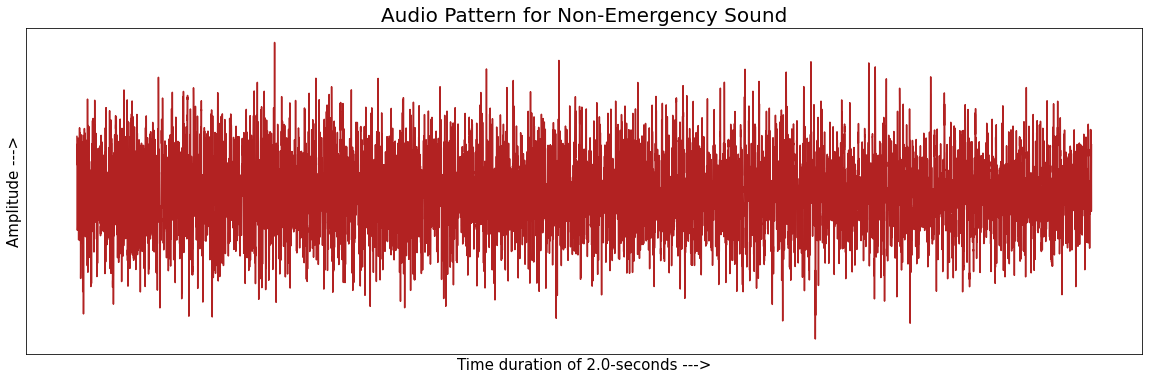

In [28]:
# Visualization:
#27/5/22
# Non-Emergency Sound
#5/6/22 NO CHANGES, doest affect with main algorithm,, only EDA visaulization part
plt.figure(figsize=(20,6))
plt.yticks([ ]) 
plt.xticks([ ]) 
plt.plot(np.linspace(0, 2, num=NOS),non_emergency[29],color="firebrick")
plt.title('Audio Pattern for Non-Emergency Sound',fontsize="20")
plt.xlabel(f'Time duration of {NOS/sampling_rate}-seconds --->',fontsize="15")
plt.ylabel('Amplitude --->',fontsize="15")
plt.show()

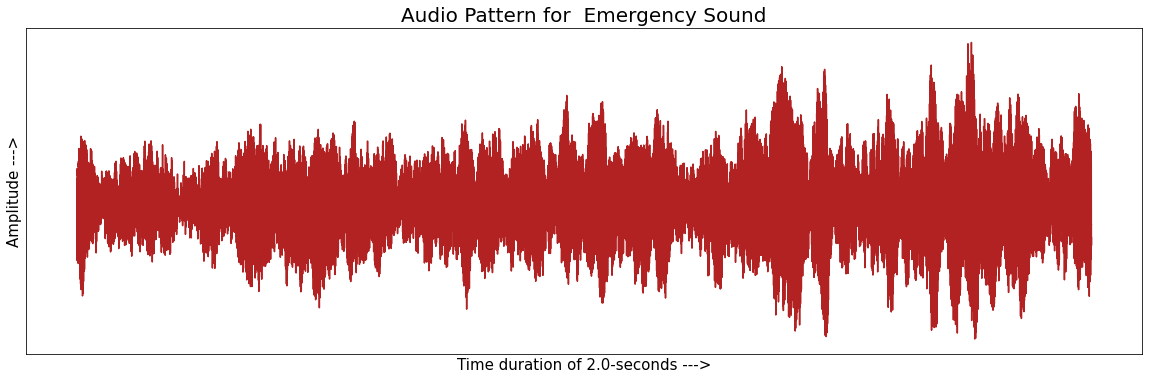

In [29]:
# Visualization:

# Emergency Sound
plt.figure(figsize=(20,6))
plt.yticks([ ]) 
plt.xticks([ ]) 
# plt.plot(np.linspace(0, 2, num=NOS),emergency[1101],color="firebrick")
plt.plot(np.linspace(0, 2, num=NOS),emergency[25],color="firebrick")
plt.title('Audio Pattern for  Emergency Sound',fontsize="20")
plt.xlabel(f'Time duration of {NOS/sampling_rate}-seconds --->',fontsize="15")
plt.ylabel('Amplitude --->',fontsize="15")
plt.show()

## 6. Split data into Train - Test 

Splitting the data into 80% train set and 20% testing set. 

In [30]:
# Step 1: Combining the Emergency and Non Emergency audio chunks
audio = np.concatenate([emergency,non_emergency])

# Step 2: Assigning labels 
labels1 = np.zeros(len(emergency))
labels2 = np.ones(len(non_emergency))

# concatenate labels
labels = np.concatenate([labels1,labels2])

In [31]:
print(f'The shape of the combined audio data is {audio.shape}')

The shape of the combined audio data is (3002, 32000)


In [32]:
print(len(labels1),"+",len(labels2),"==>",len(labels))

1374 + 1628 ==> 3002


In [33]:
# Train-test splitting:
X_train, X_test, Y_train, Y_test = train_test_split(np.array(audio), np.array(labels), stratify=labels, test_size=0.20, 
                                                    random_state=12, shuffle=True)
print("TRAINing-->")
print('X_train', X_train.shape,'Y_train', Y_train.shape)
print()

print("TESTing-->")
print('X_test', X_test.shape,'Y_test', Y_test.shape)
 

TRAINing-->
X_train (2401, 32000) Y_train (2401,)

TESTing-->
X_test (601, 32000) Y_test (601,)


In [34]:
# Reshaping the 2-Dimensional array into 3-Dimensional array by setting the third dimension to 1:
# meeans X=some value Y =some value Z will be -1!!

X_train_features = X_train.reshape(len(X_train),-1,1)
X_test_features = X_test.reshape(len(X_test), -1,1)

print('The reshaped X_train array has size:', X_train_features.shape)
print('The reshaped X_test array has size:', X_test_features.shape)

The reshaped X_train array has size: (2401, 32000, 1)
The reshaped X_test array has size: (601, 32000, 1)


## Audio Classification Using Time Domain Features

## Model Architecture using CNN

Building the model using Conv1D and Time Domain features. Heres, using Functional APIs of Keras.

In [35]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.callbacks import *

In [36]:
#20/5/22
def cnn_model(X_tr):#x_training
    
    inputs = Input(shape= (X_tr.shape[1], X_tr.shape[2]))
    
    # first Conv1D Layer with 8 filters of height 13:
    conv = Conv1D(8,13, padding='same', activation='relu')(inputs)
    conv = Dropout(0.3)(conv)
    conv = MaxPooling1D(2)(conv)
    
    # 2nd Conv1D Layer with 16 filters of height 11:
    conv = Conv1D(16,11, padding='same', activation='relu')(inputs)
    conv = Dropout(0.3)(conv)
    conv = MaxPooling1D(2)(conv)
    
    # Global MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)
    
    # Dense Layer
    conv = Dense(16, activation='relu')(conv)
    outputs = Dense(1,activation='sigmoid')(conv)
    
    model = Model(inputs, outputs)
    
    # Model Compiler:
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics =['acc'])
    
    # Model Checkpoint
    model_checkpoint = ModelCheckpoint('best_model_cnn.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    
    return model, model_checkpoint

In [37]:
# Calling the model:
model1, model_checkpoint1 = cnn_model(X_train_features)

In [38]:
# Shape and parameters at each layer
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32000, 1)]        0         
                                                                 
 conv1d_1 (Conv1D)           (None, 32000, 16)         192       
                                                                 
 dropout_1 (Dropout)         (None, 32000, 16)         0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 16000, 16)        0         
 1D)                                                             
                                                                 
 global_max_pooling1d (Globa  (None, 16)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                272   

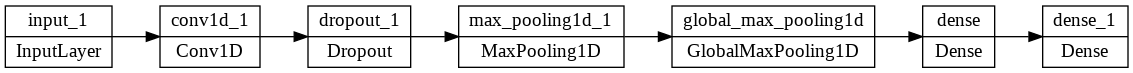

In [39]:
#17/2/22
from keras.utils.vis_utils import plot_model
plot_model(model1, rankdir='LR')

In [40]:
# plot_model(model1,show_shapes=True, rankdir='TB')

Lets train the model for predefined epochs:

In [41]:
# model training
historyCNN_TD = model1.fit(X_train_features, Y_train ,epochs=epochs_value, callbacks=[model_checkpoint1], batch_size=32, 
                    validation_data=(X_test_features, Y_test))

# accuracy for the model evaluation

Epoch 1/10
75/76 [============================>.] - ETA: 0s - loss: 0.6737 - acc: 0.5546
Epoch 1: val_loss improved from inf to 0.66718, saving model to best_model_cnn.hdf5
76/76 [==============================] - 46s 588ms/step - loss: 0.6736 - acc: 0.5548 - val_loss: 0.6672 - val_acc: 0.6223
Epoch 2/10
75/76 [============================>.] - ETA: 0s - loss: 0.6424 - acc: 0.6817
Epoch 2: val_loss improved from 0.66718 to 0.64453, saving model to best_model_cnn.hdf5
76/76 [==============================] - 43s 562ms/step - loss: 0.6424 - acc: 0.6818 - val_loss: 0.6445 - val_acc: 0.7537
Epoch 3/10
75/76 [============================>.] - ETA: 0s - loss: 0.6134 - acc: 0.7496
Epoch 3: val_loss improved from 0.64453 to 0.62225, saving model to best_model_cnn.hdf5
76/76 [==============================] - 45s 594ms/step - loss: 0.6134 - acc: 0.7493 - val_loss: 0.6222 - val_acc: 0.7537
Epoch 4/10
75/76 [============================>.] - ETA: 0s - loss: 0.5915 - acc: 0.7629
Epoch 4: val_loss 

In [42]:
# load the best model weights
model1.load_weights('best_model_cnn.hdf5')

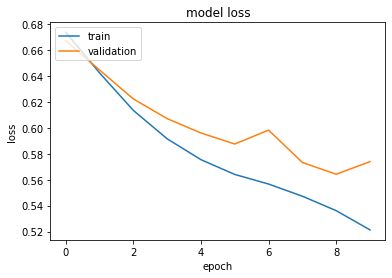

In [43]:
# summarize history for loss
plt.plot(historyCNN_TD.history['loss'])
plt.plot(historyCNN_TD.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

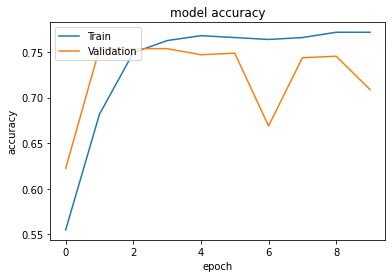

In [44]:
plt.plot(historyCNN_TD.history['acc'])
plt.plot(historyCNN_TD.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Evaluation

In [45]:
# Checking the model's performance on the Test set

_,CNN_TD_acc = model1.evaluate(X_test_features, Y_test)
CNN_TD_acc=round(CNN_TD_acc*100,2)
print("Validation Accuracy:",CNN_TD_acc,"%")

19/19 [==============================] - 2s 131ms/step - loss: 0.5642 - acc: 0.7454
Validation Accuracy: 74.54 %


## Prediction

In [46]:
# For Prediction: the input audio
#limit 0 to 600 (601)
#NE 101 45 111 77 5
#E `104 (33)  10 80 55 61 (301) 452(truck sound+ambulance)   
index = 33
test_audio = X_test[index]

# Using IPython.display to play the audio
ipd.Audio(test_audio, rate=sampling_rate)

In [47]:
# classification
index=33
feature = X_test_features[index]
prob = model1.predict(feature.reshape(1,-1,1))
if (prob[0][0] < 0.5):
    pred='emergency'
else:
    pred='non emergency' 

print("Prediction:",pred)

Prediction: non emergency


--------------------

## Model Architecture using LSTM Model

Let's define the model architecture using LSTM layers and the time domain features.

In [48]:
#Reshaping the Audio chunks:

X_train_features = X_train.reshape(len(X_train),-1,160)
X_test_features = X_test.reshape(len(X_test), -1,160)

print('The reshaped X_train array has size:', X_train_features.shape)
print('The reshaped X_test array has size:', X_test_features.shape)

The reshaped X_train array has size: (2401, 200, 160)
The reshaped X_test array has size: (601, 200, 160)


In [49]:
# LSTM based deep learning model architecture
def lstm_model(X_tr):
    
    inputs = Input(shape=(X_tr.shape[1], X_tr.shape[2]))
    print(X_tr.shape[1],X_tr.shape[2])
    # LSTM Layer 1
    x = LSTM(128)(inputs)
    x = Dropout(0.3)(x)
    
    # LSTM Layer 2
    x = LSTM(128)(inputs)
    x = Dropout(0.3)(x)
    
    # LSTM Layer 3
    x = LSTM(64)(inputs)
    x = Dropout(0.3)(x)
    
    # Dense Layer
    x = Dense(64, activation = 'relu')(x)
    x = Dense(1, activation = 'sigmoid')(x)
    
    model = Model(inputs, x)
    
    # Model compiler
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    
    # Model Checkpoint
    mc = ModelCheckpoint('best_model_lstm.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    
    return model, mc

In [50]:
# Calling the function
model2, model_checkpoint2 = lstm_model(X_train_features)


# Model Summary:
model2.summary()

200 160
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 160)]        0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                57600     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 61,825
Trainable params: 61,825
Non-trainable params: 0
_________________________________________________________________


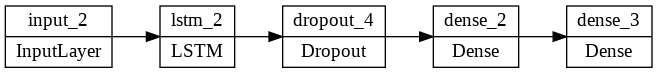

In [51]:
#TB LR
from keras.utils.vis_utils import plot_model
plot_model(model2, rankdir='LR')
 

In [52]:
# plot_model(model2,show_shapes=True, rankdir='TB')

In [53]:
# Training the model:

historyLSTM_TD=model2.fit(X_train_features, Y_train, epochs=epochs_value, 
                  callbacks=[model_checkpoint2], batch_size=32,              # batch size + epochs : hyperparameters
                  validation_data=(X_test_features, Y_test))

Epoch 1/10
76/76 [==============================] - ETA: 0s - loss: 0.6709 - acc: 0.5868
Epoch 1: val_loss improved from inf to 0.62492, saving model to best_model_lstm.hdf5
76/76 [==============================] - 12s 129ms/step - loss: 0.6709 - acc: 0.5868 - val_loss: 0.6249 - val_acc: 0.7388
Epoch 2/10
76/76 [==============================] - ETA: 0s - loss: 0.5758 - acc: 0.6789
Epoch 2: val_loss improved from 0.62492 to 0.58855, saving model to best_model_lstm.hdf5
76/76 [==============================] - 9s 119ms/step - loss: 0.5758 - acc: 0.6789 - val_loss: 0.5885 - val_acc: 0.6922
Epoch 3/10
76/76 [==============================] - ETA: 0s - loss: 0.5551 - acc: 0.6976
Epoch 3: val_loss improved from 0.58855 to 0.56387, saving model to best_model_lstm.hdf5
76/76 [==============================] - 9s 120ms/step - loss: 0.5551 - acc: 0.6976 - val_loss: 0.5639 - val_acc: 0.7271
Epoch 4/10
76/76 [==============================] - ETA: 0s - loss: 0.5476 - acc: 0.7164
Epoch 4: val_loss

In [54]:
# load best model weights
model2.load_weights('best_model_lstm.hdf5')

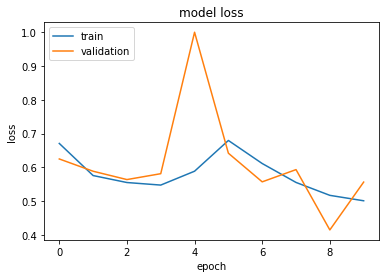

In [55]:
# summarize history for loss
plt.plot(historyLSTM_TD.history['loss'])
plt.plot(historyLSTM_TD.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

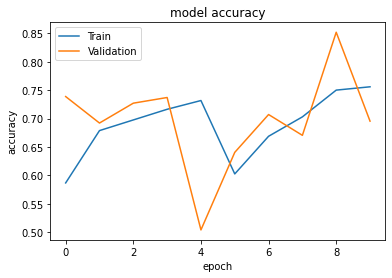

In [56]:
plt.plot(historyLSTM_TD.history['acc'])
plt.plot(historyLSTM_TD.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [57]:
# Model Evaluation:

_,LSTM_TD_acc = model2.evaluate(X_test_features, Y_test)
LSTM_TD_acc=round(LSTM_TD_acc*100,2)
print("Validation Accuracy:",LSTM_TD_acc,"%")

19/19 [==============================] - 1s 33ms/step - loss: 0.4147 - acc: 0.8519
Validation Accuracy: 85.19 %


In [58]:
# For Prediction using LSTM: the input audio
#301 was not giving correct preidction by model1
#E 301 33
index = 33
test_audio = X_test[index]

# Using IPython.display to play the audio
ipd.Audio(test_audio, rate=sampling_rate)

In [59]:
feature = X_test_features[index]

prob = model2.predict(feature.reshape(1,-1,160))

if (prob[0][0] < 0.5):
    pred='emergency'
else:
    pred='non emergency' 

print("Prediction:",pred)

Prediction: emergency


## Spectrogram Features

Defining a function that computes the spectrogram for a given audio chunk


In [60]:
def spec_log(audio, sample_rate, eps = 1e-10):
    
    freq, times, spec = scipy.signal.spectrogram(audio, fs= sample_rate, nperseg=320, noverlap=160)
    return freq, times, np.log(spec.T.astype(np.float32) + eps)

In [61]:
# For Visualization of the Spectrogram:

def spec_plot(spectrogram, label):
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(211)
    ax.imshow(spectrogram.T, aspect='auto', extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    ax.set_title('Spectrogram of '+label)
    ax.set_xlabel('Seconds')
    ax.set_ylabel('Freqs in Hz')
    plt.show()

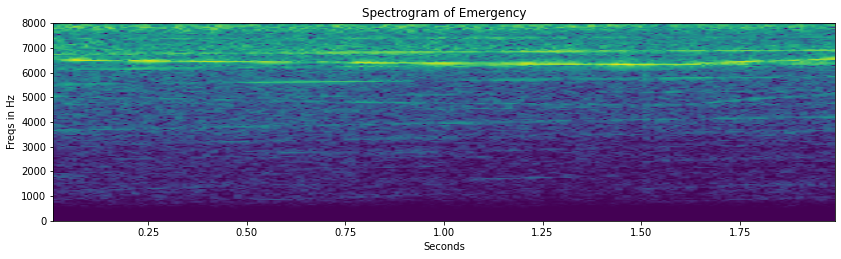

In [62]:
# Computing and Visualizing the Spectrogram for Emergency:

freqs, times, spectrogram = spec_log(emergency[131], sample_rate)
spec_plot(spectrogram,"Emergency")

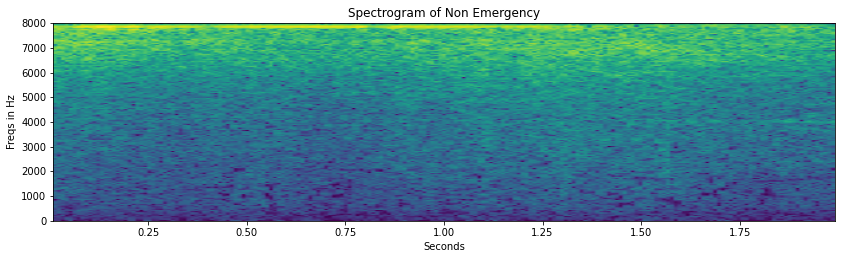

In [63]:
# Computing and Visualizing the Spectrogram for Non-Emergency:
freqs, times, spectrogram = spec_log(non_emergency[162], sample_rate)
spec_plot(spectrogram,"Non Emergency")

In [64]:
spectrogram.shape

(199, 161)

## Extract the spectrogram features

Extract the spectrogram features from the same audio set that we used above during the time domain features.

In [65]:
def extract_spec_features(X_tr):
    
    # defining empty list to store the features:
    features = []
    
    # We only need the 3rd array of Spectrogram so assigning the first two arrays as _
    for i in X_tr:
        _,_, spectrogram = spec_log(i, sample_rate)

        mean = np.mean(spectrogram, axis=0)
        std = np.std(spectrogram, axis=0)
        spectrogram = (spectrogram - mean)/std

        features.append(spectrogram)
    
    # returning the features as array
    return np.array(features)

# Calling extract function to get training and testing sets:

X_train_features = extract_spec_features(X_train)
X_test_features = extract_spec_features(X_test)

print(len(X_train_features),len(X_test_features))
 

2401 601


In [66]:
model3, modelcheckpoint3 = cnn_model(X_train_features)
model3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 199, 161)]        0         
                                                                 
 conv1d_3 (Conv1D)           (None, 199, 16)           28352     
                                                                 
 dropout_6 (Dropout)         (None, 199, 16)           0         
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 99, 16)           0         
 1D)                                                             
                                                                 
 global_max_pooling1d_1 (Glo  (None, 16)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 16)                272 

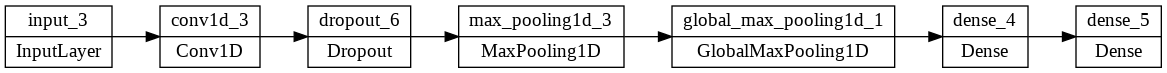

In [67]:
plot_model(model3,show_shapes=False, rankdir='LR')

In [68]:
# plot_model(model3,show_shapes=True, rankdir='TB')

In [69]:
# Model Training:
historyCNN_S=model3.fit(X_train_features, Y_train, epochs=epochs_value, callbacks=[modelcheckpoint3], batch_size=32, 
                    validation_data=(X_test_features, Y_test))

Epoch 1/10
75/76 [============================>.] - ETA: 0s - loss: 0.6724 - acc: 0.7575
Epoch 1: val_loss improved from inf to 0.30769, saving model to best_model_cnn.hdf5
76/76 [==============================] - 6s 76ms/step - loss: 0.6722 - acc: 0.7576 - val_loss: 0.3077 - val_acc: 0.8968
Epoch 2/10
75/76 [============================>.] - ETA: 0s - loss: 0.1676 - acc: 0.9517
Epoch 2: val_loss improved from 0.30769 to 0.20638, saving model to best_model_cnn.hdf5
76/76 [==============================] - 6s 73ms/step - loss: 0.1676 - acc: 0.9517 - val_loss: 0.2064 - val_acc: 0.9534
Epoch 3/10
75/76 [============================>.] - ETA: 0s - loss: 0.0774 - acc: 0.9921
Epoch 3: val_loss improved from 0.20638 to 0.16367, saving model to best_model_cnn.hdf5
76/76 [==============================] - 6s 73ms/step - loss: 0.0774 - acc: 0.9921 - val_loss: 0.1637 - val_acc: 0.9584
Epoch 4/10
75/76 [============================>.] - ETA: 0s - loss: 0.0478 - acc: 0.9958
Epoch 4: val_loss improv

Load the best saved model

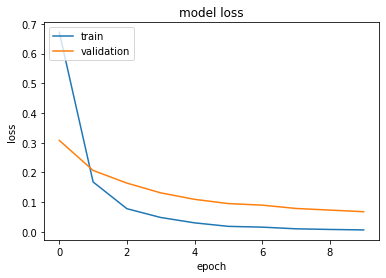

In [70]:
# summarize history for loss
plt.plot(historyCNN_S.history['loss'])
plt.plot(historyCNN_S.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

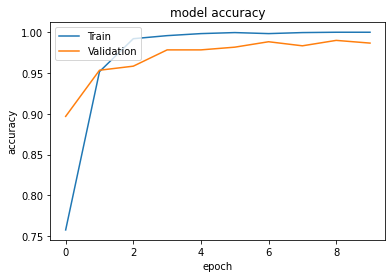

In [71]:
plt.plot(historyCNN_S.history['acc'])
plt.plot(historyCNN_S.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [72]:
#101 333 NE 104 555 E
index = 555
test_audio = X_test[index]
 
# Using IPython.display to play the audio
ipd.Audio(test_audio, rate=sampling_rate)

In [73]:
 
feature = X_test_features[index]

prob = model3.predict(feature.reshape(-1,199 ,161))

if (prob[0][0] < 0.5):
    pred='emergency'
else:
    pred='non emergency' 

print("Prediction:",pred)

Prediction: emergency


In [74]:
# model's performance on the test set:
_,CNN_S_acc = model3.evaluate(X_test_features, Y_test)
CNN_S_acc=round(CNN_S_acc*100,2)
print("Validation Accuracy:",CNN_S_acc,"%")
 

19/19 [==============================] - 0s 14ms/step - loss: 0.0673 - acc: 0.9867
Validation Accuracy: 98.67 %


## Calling the LSTM Model

In [75]:
model4, modelcheckpoint4 = lstm_model(X_train_features)
# Number of parameters and shape of each layer:
model4.summary()

199 161
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 199, 161)]        0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                57856     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 62,081
Trainable params: 62,081
Non-trainable params: 0
_________________________________________________________________


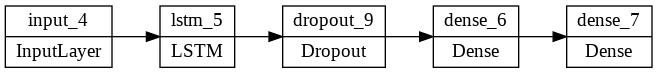

In [76]:
plot_model(model4 , rankdir='LR')

In [ ]:
# Train the model
historyLSTM_S=model4.fit(X_train_features, Y_train, epochs=epochs_value, callbacks=[modelcheckpoint4], batch_size=32, 
                    validation_data=(X_test_features, Y_test))

Epoch 1/10
76/76 [==============================] - ETA: 0s - loss: 0.6792 - acc: 0.5689
Epoch 1: val_loss improved from inf to 0.65248, saving model to best_model_lstm.hdf5
76/76 [==============================] - 12s 129ms/step - loss: 0.6792 - acc: 0.5689 - val_loss: 0.6525 - val_acc: 0.6373
Epoch 2/10
76/76 [==============================] - ETA: 0s - loss: 0.5721 - acc: 0.7384
Epoch 2: val_loss improved from 0.65248 to 0.53774, saving model to best_model_lstm.hdf5
76/76 [==============================] - 10s 125ms/step - loss: 0.5721 - acc: 0.7384 - val_loss: 0.5377 - val_acc: 0.7554
Epoch 3/10
76/76 [==============================] - ETA: 0s - loss: 0.3310 - acc: 0.8726
Epoch 3: val_loss improved from 0.53774 to 0.52422, saving model to best_model_lstm.hdf5
76/76 [==============================] - 9s 122ms/step - loss: 0.3310 - acc: 0.8726 - val_loss: 0.5242 - val_acc: 0.8319
Epoch 4/10
76/76 [==============================] - ETA: 0s - loss: 0.2867 - acc: 0.9063
Epoch 4: val_los

Load the weights of the best model:

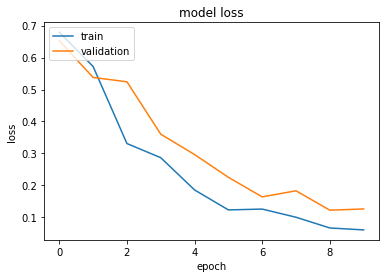

In [ ]:
model4.load_weights('best_model_lstm.hdf5')
# summarize history for loss
plt.plot(historyLSTM_S.history['loss'])
plt.plot(historyLSTM_S.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


 
 



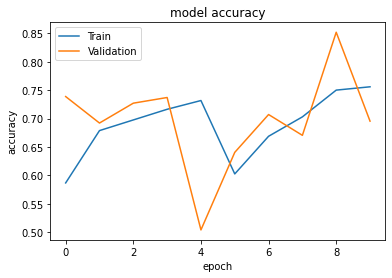

In [ ]:
plt.plot(historyLSTM_TD.history['acc'])
plt.plot(historyLSTM_TD.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Evaluation
Evaluating the performance of the model on the test set:

In [ ]:
_,LSTM_S_acc = model4.evaluate(X_test_features, Y_test)
LSTM_S_acc=round(LSTM_S_acc*100,2)
print("Validation Accuracy:",LSTM_S_acc,"%")

19/19 [==============================] - 1s 34ms/step - loss: 0.1224 - acc: 0.9584
Validation Accuracy: 95.84 %


In [ ]:
index = 555
test_audio = X_test[index]
 
# Using IPython.display to play the audio
ipd.Audio(test_audio, rate=sampling_rate)


In [ ]:
feature = X_test_features[index]

prob = model4.predict(feature.reshape(-1,199 ,161))

if (prob[0][0] < 0.5):
    pred='emergency'
else:
    pred='non emergency' 

print("Prediction:",pred)

Prediction: emergency


Text(0.5, 1.0, 'LSTM (S)with epochs= 10 Accuracy: 95.84')

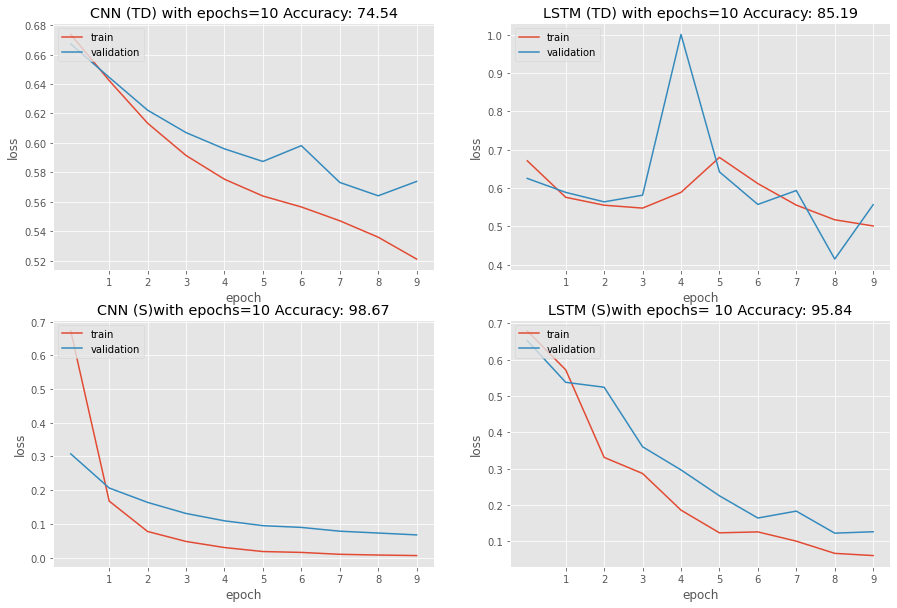

In [ ]:
plt.style.use('ggplot')
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
plt.subplots_adjust(wspace=0.2)


ax1.plot(historyCNN_TD.history['loss'])
ax1.plot(historyCNN_TD.history['val_loss'])
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')
ax1.set_xticks(range(1, epochs_value))
ax1.legend(['train', 'validation'], loc='upper left')
str1="CNN (TD) with epochs="+str(epochs_value)+" Accuracy: "+str(CNN_TD_acc)
ax1.set_title(str1)

ax2.plot(historyLSTM_TD.history['loss'])
ax2.plot(historyLSTM_TD.history['val_loss'])
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(1, epochs_value))
ax2.legend(['train', 'validation'], loc='upper left')
str2="LSTM (TD) with epochs="+str(epochs_value)+" Accuracy: "+str(LSTM_TD_acc)
ax2.set_title(str2)

ax3.plot(historyCNN_S.history['loss'])
ax3.plot(historyCNN_S.history['val_loss'])
ax3.set_ylabel('loss')
ax3.set_xlabel('epoch')
ax3.set_xticks(range(1, epochs_value))
 
ax3.legend(['train', 'validation'], loc='upper left')
str3="CNN (S)with epochs="+str(epochs_value)+" Accuracy: "+str(CNN_S_acc)
ax3.set_title(str3)

ax4.plot(historyLSTM_S.history['loss'])
ax4.plot(historyLSTM_S.history['val_loss'])
ax4.set_ylabel('loss')
ax4.set_xlabel('epoch')
ax4.legend(['train', 'validation'], loc='upper left')
ax4.set_xticks(range(1, epochs_value))
str4="LSTM (S)with epochs= "+str(epochs_value)+" Accuracy: "+str(LSTM_S_acc)
ax4.set_title(str4)


Text(0.5, 1.0, 'LSTM (S)with epochs= 10 Accuracy: 95.84')

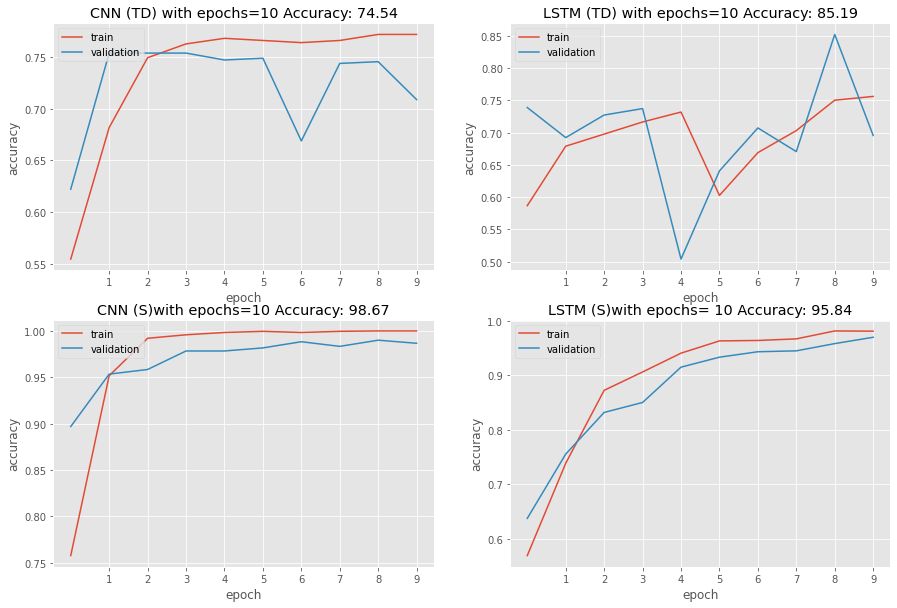

In [ ]:
plt.style.use('ggplot')
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
plt.subplots_adjust(wspace=0.2)


ax1.plot(historyCNN_TD.history['acc'])
ax1.plot(historyCNN_TD.history['val_acc'])
ax1.set_ylabel('accuracy')
ax1.set_xlabel('epoch')
ax1.set_xticks(range(1, epochs_value))
ax1.legend(['train', 'validation'], loc='upper left')
str1="CNN (TD) with epochs="+str(epochs_value)+" Accuracy: "+str(CNN_TD_acc)
ax1.set_title(str1)

ax2.plot(historyLSTM_TD.history['acc'])
ax2.plot(historyLSTM_TD.history['val_acc'])
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')
ax2.set_xticks(range(1, epochs_value))
ax2.legend(['train', 'validation'], loc='upper left')
str2="LSTM (TD) with epochs="+str(epochs_value)+" Accuracy: "+str(LSTM_TD_acc)
ax2.set_title(str2)

ax3.plot(historyCNN_S.history['acc'])
ax3.plot(historyCNN_S.history['val_acc'])
ax3.set_ylabel('accuracy')
ax3.set_xlabel('epoch')
ax3.set_xticks(range(1, epochs_value))
ax3.legend(['train', 'validation'], loc='upper left')
str3="CNN (S)with epochs="+str(epochs_value)+" Accuracy: "+str(CNN_S_acc)
ax3.set_title(str3)

ax4.plot(historyLSTM_S.history['acc'])
ax4.plot(historyLSTM_S.history['val_acc'])
ax4.set_ylabel('accuracy')
ax4.set_xlabel('epoch')
ax4.set_xticks(range(1, epochs_value))
ax4.legend(['train', 'validation'], loc='upper left')
str4="LSTM (S)with epochs= "+str(epochs_value)+" Accuracy: "+str(LSTM_S_acc)
ax4.set_title(str4)


 


In [ ]:
# X = ['DL through Time Domain','DL through Spectrogram']
# TD = [CNN_TD_acc,LSTM_TD_acc ]
# S = [CNN_S_acc,LSTM_S_acc ]
 
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, TD, 0.4, label = 'CNN')
# plt.bar(X_axis + 0.2, S, 0.4, label = 'LSTM')
  
# plt.xticks(X_axis, X)
# # plt.xlabel("Implementation of DL")
# plt.ylabel("Accuracy of model")
# plt.title("Accuracy of model in each case")
# plt.legend()
# plt.show()

In [ ]:
def hypothesis_testing(a1,a2,b1,b2):
  mydict={}
  mydict['Time Domain']=(['CNN',a1],['LSTM',a2])
  mydict['Spectrogram']=(['CNN',b1],['LSTM',b2])
  print("DATA:")
  print(mydict)
  statementa1="The model CNN performs well in Time Domain as compared to LSTM"
  statementa2="The model LSTM performs well in Time Domain as compared to CNN"
  statementa3="Both models CNN & LSTM have equal performance in Time Domain"

  statementb1="The model CNN performs well in Spectrogram  as compared to LSTM"
  statementb2="The model LSTM performs well in Spectrogram as compared to CNN"
  statementb3="Both models CNN & LSTM have equal performance in Spectrogram"


  print("THE Accuracy Graph")
  X = ['DL through Time Domain','DL through Spectrogram']
  z1 = [a1,b1 ]
  z2= [a2,b2 ]
  
    
  X_axis = np.arange(len(X))
  plt.figure(figsize=(6,6))  
  plt.bar(X_axis - 0.2, z1, 0.4, label = 'CNN')
  plt.bar(X_axis + 0.2, z2, 0.4, label = 'LSTM')
    
  plt.xticks(X_axis, X)
  # plt.xlabel("Implementation of DL")
  plt.ylabel("Accuracy")
  plt.ylim(0,100)
  plt.title("Accuracy of model in each case")
  plt.legend()
  plt.show()

  print("INFERENCES FROM THE ABOVE GRAPH")
  if a1>a2 and a1-a2>0.5:
    st1=statementa1
    print(statementa1)
  elif a1<a2 and a2-a1>0.5:
    st1=statementa2
    print(statementa2)
  else:
    st1=statementa3
    print(statementa3)

  if b1>b2 and b1-b2>0.5:
    st2=statementb1
    print(statementb1)
  elif b1<b2 and  b2-b1>0.5:
    st2=statementb2
    print(statementb2)
  else:
    st2=statementb3
    print(statementb3)

  if abs(a1-b1)<0.50 and abs(a2-b2)<0.50:
    st3="OVERAll: Not much difference in Time domain and Spectrogram "
    print(st3)
  elif a1>b1 and a2>b2:
    st3="OVERAll: Both models (LSTM and CNN) performs better in TimeDomain"
    print(st3)
  elif a1<b1 and a2<b2:
    st3=" OVERAll:Both models  (LSTM and CNN) performs better in Spectrogram"
    print(st3)
  else:
    st3="OVERAll: one model performs better in time domain and other in spectrogram "
    print(st3)

  return st1,st2,st3
  

DATA:
{'Time Domain': (['CNN', 74.54], ['LSTM', 85.19]), 'Spectrogram': (['CNN', 98.67], ['LSTM', 95.84])}
THE Accuracy Graph


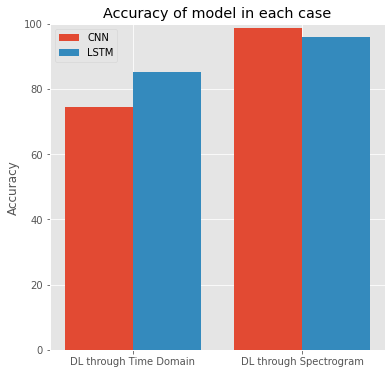

INFERENCES FROM THE ABOVE GRAPH
The model LSTM performs well in Time Domain as compared to CNN
The model CNN performs well in Spectrogram  as compared to LSTM
 OVERAll:Both models  (LSTM and CNN) performs better in Spectrogram


In [ ]:
st1,st2,st3=hypothesis_testing(CNN_TD_acc,LSTM_TD_acc,CNN_S_acc,LSTM_S_acc)
# st1,st2,st3=hypothesis_testing(50.22,50,34.33,80.45)

# Storage in text file
### Now we run the this above projects for different epochs
### And we store them in a separatee text file as epochs.txt



In [ ]:
def writingintofile(mydata):

  f = open('/content/drive/MyDrive/MTECH/epochs.txt','a')
  f.write(mydata+"\n")
  print('done')
  f.close()


In [ ]:
data=str(epochs_value)+"|"+str(CNN_TD_acc)+"|"+str(LSTM_TD_acc)+"|"+str(CNN_S_acc)+"|"+str(LSTM_S_acc)+"|"+st1+"|"+st2+"|"+st3
# writingintofile(data)
# print(data)

In [ ]:
import numpy as np
 
import matplotlib.pyplot as plt
def TheEpochsAnalysis():
  mydict={}
  mylist=[]
  f = open('/content/drive/MyDrive/MTECH/epochs.txt','r')
  for each in f.readlines():
    e,c1,l1,c2,l2,h1,h2,h3=each.split("|")
    #  print(e,c1,c2,l1,l2)
  # if e not in mydict:
  #   mydict[e]=[(c1,l1,c2,l2)]
  # else:
  #   mydict[e].append((c1,l1,c2,l2))

  # print(type(mydict))
    mylist.append((int(e),float(c1),float(l1),float(c2),float(l2)))

  mylist_c1ea=[]
  mylist_l1ea=[]
  mylist_c2ea=[]
  mylist_l2ea=[]
  mylist_c1a=[]
  mylist_l1a=[]
  mylist_c2a=[]
  mylist_l2a=[]

  #############################
  for each in mylist:
    e,c1,l1,c2,l2=each
    mylist_c1ea.append([e,c1])
    mylist_c1a.append(c1)

    mylist_l1ea.append([e,l1])
    mylist_l1a.append(l1)

    mylist_c2ea.append([e,c2])
    mylist_c2a.append(c2)

    mylist_l2ea.append([e,l2])
    mylist_l2a.append(l2)

    if e not in mydict:
      mydict[e]=[(c1,l1,c2,l2)]
    else:
      mydict[e].append((c1,l1,c2,l2))


  dictionary1 = sorted(mydict.items())
  mydict=dict(dictionary1)
  # print(mydict) 

  print("CNN_TIME_DOMAIN:",mylist_c1ea)
  print("LSTM_TIME_DOMAIN:",mylist_l1ea)

  print("CNN_SPECTROGRAM:",mylist_c2ea)
  print("LSTM_SPECTROGRAM:",mylist_l2ea)

  

  ##FINDINNG the minimum and maximumm value in all 4 cases
  def min_max_acc(mystr,acc,epochacc):
    smallest=min(acc)
    largest=max(acc)
    # print(smallest,largest)
    print(f"<----------Summary of {mystr} ---------->")

    print(f"Epochs with smallest accuracy {smallest} ==> ",end="")
    for [x,y] in epochacc:
      if y==smallest:
        print(x,end=",",sep="||")
    
    print("")
    print(f"Epochs with largest accuracy {largest} ==> ",end="")   
    for [x,y] in epochacc:
      if y==largest:
        print(x,end=",",sep="||")
 
        

     
    


      
  min_max_acc('CNN_TIME-DOMAIN',mylist_c1a,mylist_c1ea)
  print("")
  min_max_acc('LSTM_TIME-DOMAIN',mylist_l1a,mylist_l1ea)
  print("")
  min_max_acc('CNN_SPECTROGRAM',mylist_c2a,mylist_c2ea)
  print("")
  min_max_acc('LSTM_SPECTROGRAM',mylist_l2a,mylist_l2ea)

  c1=[]
  l1=[]
  c2=[]
  l2=[]
  mylabels=[]
  for k,v in mydict.items():
      
    for i in range(len(v)):
      mylabels.append(str(k))
      a,b,c,d=v[i]
        
      c1.append(a)
      l1.append(b)
      c2.append(c)
      l2.append(d)



  labels = mylabels

   
  def autolabel1(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
  def autolabel2(rects):
     
    for rect in rects:
        height = rect.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')



  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

   


  fig,ax1 = plt.subplots(figsize=(25,10))
  rects1 = ax1.bar(x - width/2 ,  c1, width, label='CNN_TD')
  rects2 = ax1.bar(x + width/2 , l1, width, label='LSTM_TD')
  
  autolabel1(rects1)
  autolabel1(rects2)
  ax1.set_ylabel('Acuracy',fontsize=20)
  ax1.set_xlabel('Number of epochs in increaisng order',fontsize=20)
  ax1.set_title('Running multiple times for different number of epochs',fontsize=20)
  ax1.legend(loc='upper left')
  ax1.set_xticks(x) # values
  ax1.set_xticklabels(labels) # labels
 
 

  fig,ax2 = plt.subplots(figsize=(25,10))
  rects1 = ax2.bar(x - width/2 ,  c2, width, label='CNN_S')
  rects2 = ax2.bar(x + width/2 , l2, width, label='LSTM_S')
  autolabel2(rects1)
  autolabel2(rects2)
  
  ax2.set_ylabel('Acuracy',fontsize=20)
  ax2.set_xlabel('Number of epochs in increaisng order',fontsize=20)
  ax2.set_title('Running multiple times for different number of epochs',fontsize=20)
  ax2.legend(loc='upper left')
  ax2.set_xticks(x) # values
  ax2.set_xticklabels(labels) # labels

  

  plt.show()

In [ ]:
# mylist=[ (2,43,44,54,64),(2,43,64,64,66),(6,54,80,65,74),(2,54,23,54,23),(3,54,68,43,11),(3,10,68,43,11),(10,54,35,65,74)]
# mydict={}
# for each in mylist:
#   e,c1,l1,c2,l2=each
#   if e not in mydict:
#     mydict[e]=[(c1,l1,c2,l2)]
#   else:
#     mydict[e].append((c1,l1,c2,l2))

 

# dictionary1 = sorted(mydict.items())
# mydict=dict(dictionary1)

In [ ]:
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [ ]:
# writingintofile(data)
# TheEpochsAnalysis()

<IPython.core.display.Javascript object>